In [172]:
# Для анализа данных
import numpy as np
import pandas as pd

# Для графиков
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
df = pd.read_excel('auto_complectations.xlsx', sheet_name='Sheet1')

In [174]:
df.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   int64 
 5   doors                                                 1703 non-null   int64 
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                             1703 non-null 

##### 1. Название столбцов желательно привести к  единому виду. Сейчас очень неудобно

In [176]:
df.columns

Index(['brand', 'model', 'complect', 'type_car', 'seats', 'doors', 'Двигатель',
       'Мощность', 'Крутящий момент двигателя', 'Коробка передач', 'Привод',
       'Разгон до сотни', 'Максимальная скорость',
       'Расход топлива (л/100 км)\nгород / трасса / смешанный',
       'Дорожный просвет', 'Габариты (длина × ширина × высота)',
       'Колёсная база', 'Объём багажника', 'Объём багажника максимальный',
       'Объём топливного бака', 'Масса автомобиля'],
      dtype='object')

##### Создадим список англоязычный названий

In [177]:
eng_col_name = ['engine', 'power', 'engine_torque', 'transmission', 'drive_gear',
                '0_100time', 'max_speed', 'fuel_con_CHM', 'G_clearance', 'dimensions_LWH',
                'wheelbase', 'trunk_vol', 'max_trunk_vol','fuel_tank', 'vehicle_weight'
               ] # CHM в fuel_con_CHM - city / highway / mixed, LWH в dimensions_LWH - length × width × height
# Провекра
len(df.columns[6:]) == len(eng_col_name)

True

In [178]:
list_for_trans = []
for col_name in df.columns[6:]:
    list_for_trans.append(col_name)
    
dict_col_name = dict(map(lambda *args: args, list_for_trans, eng_col_name))
# Замена
df = df.rename(dict_col_name, axis='columns')

# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           1703 non-null   object
 1   model           1703 non-null   object
 2   complect        1703 non-null   object
 3   type_car        1703 non-null   object
 4   seats           1703 non-null   int64 
 5   doors           1703 non-null   int64 
 6   engine          1703 non-null   object
 7   power           1703 non-null   object
 8   engine_torque   1703 non-null   object
 9   transmission    1703 non-null   object
 10  drive_gear      1703 non-null   object
 11  0_100time       1703 non-null   object
 12  max_speed       1703 non-null   object
 13  fuel_con_CHM    1703 non-null   object
 14  G_clearance     1703 non-null   object
 15  dimensions_LWH  1703 non-null   object
 16  wheelbase       1703 non-null   object
 17  trunk_vol       1703 non-null   object
 18  max_trun

##### 2. Информация о датасете

- всего 21 колонка

- 1703 строк

- числовой тип в двух колонках. Остальные текстовые, их нужно будет перевести в числовые. (Хотя некоторые алгоритмы классификации могут работать и с текстовыми значениями)

- Значения в колонках "расход топлива" и "габариты" нужно будет разбить на отдельные признаки или превратить в один, используя среднее или сумму и т.д.

##### 2.1 Признак type_car - целевая переменная.

In [179]:
# Какие значения вообще есть у этого признака
# Так-то... в большинстве случаев зная только модель автомобиля можно предсказать его тип кузова
df['type_car'].unique()

array(['Седан класса C', 'Хэтчбек класса B', 'Седан класса D',
       'Универсал повышенной проходимости класса D', 'Универсал класса D',
       'Купе класса D', 'Хэтчбек класса D', 'Седан класса E',
       'Универсал класса E', 'Хэтчбек класса E', 'Седан класса F',
       'Большой кроссовер', 'Компактный кроссовер',
       'Среднеразмерный кроссовер', 'Купе класса C', 'Спорткупе',
       'Кабриолет с мягкой крышей', 'Спорткупе класса D',
       'Спортседан класса E', 'Родстер', 'Большой внедорожник',
       'Седан класса B', 'Хэтчбек класса A', 'Кроссовер класса B', 'Вэн',
       'Горячий хэтчбек класса C', 'Внедорожник класса B',
       'Среднеразмерный внедорожник', 'Хэтчбек класса C',
       'Универсал класса C', 'Спортседан класса D', 'Купе класса E',
       'Пикап', 'Горячий седан класса C', 'Минивэн', 'Компактвэн',
       'Универсал повышенной проходимости класса E'], dtype=object)

Согласно заданию, нужно создать классификатор который будет распозновать 4 класса: 
- Седан 
- Хетчбек 
- Кроссовер 
- Внедорожник.

При этом в датасете присутсвуют и другие варианты типов кузова. Например, "универсал", "кабриолет", "купе" и т.д. Так как данных не очень много удалять эти значения не нужно.

На данный момент принято сделать следующим образом:

- Универсал, купе, кабриолет, родстер, минивен будут отнесены к единому, пятому классу "Другое"

- Пикап отнесен к классу "внедорожник"

Далее вполне можно будет отнести универсалы к хетчбекам (архитектура кузова имеет общие черты, разница в объеме багажника) 
Минивен можно отнести к классу кроссовер, а купе к седанами (однако тут нужно сразу учитыввать, что большинство купе имеют более мощный двигатель чем у обычного седана)


______________________

Сейчас оставим в колонке "type_car" только главный тип кузова без подтипов:


In [180]:
# Напишем функцию для замены названий типов кузова
def rename_type_car(type_car:str):
    '''
    Функция для замены значения в колонке "type_car"
    на класс без подклассов.
    
    На вход принимает строку с названием класса и подкласса
    Возвращает преобразованную строку.
    
    '''
    # Приведем строку к нижнему регистру 
    type_car = type_car.lower()
    
    # Назачение классов, и сразу на английском
    
    if 'седан' in type_car:
        return 'sedan'
    elif 'хэтчбек' in type_car:
        return 'hatchback'
    elif 'кроссовер' in type_car:
        return 'crossover'
    elif 'внедорожник' in type_car or 'пикап' in type_car:
        return 'SUV'
    elif 'купе' in type_car:
        return 'coupe'
    elif 'вэн' in type_car:
        return 'van'
    elif 'универсал' in type_car:
        return 'wagon'
    elif 'родстер' in type_car:
        return 'roadster'
    elif 'кабриолет' in type_car:
        return 'cabriolet'
    else:
        return 'None_type'

In [181]:
df['main_type_car'] = df.loc[:, ('type_car')].apply(lambda x: rename_type_car(x))

In [182]:
# проверим какие значения получились none_tape
df[df['main_type_car'] == 'None_type']

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,max_speed,fuel_con_CHM,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car


Все классы заменились на общий. Оставим пока, что колонку с type_car для анализа.

In [183]:
df['main_type_car'].value_counts()

crossover    754
sedan        416
SUV          200
hatchback    128
van           94
wagon         54
coupe         43
roadster       9
cabriolet      5
Name: main_type_car, dtype: int64

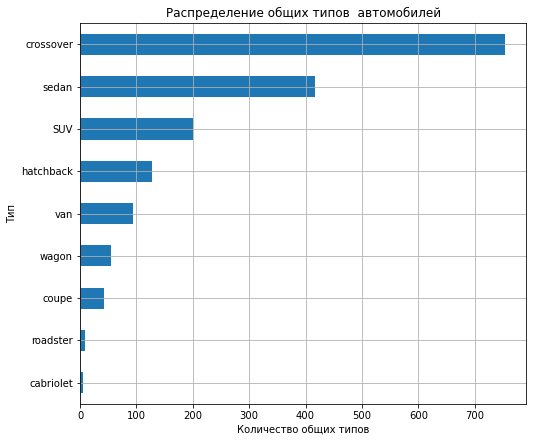

In [184]:
plt.figure(figsize=(8, 7))
plt.title('Распределение общих типов  автомобилей')
df['main_type_car'].value_counts(ascending=True).plot(kind='barh')
plt.xlabel('Количество общих типов')
plt.ylabel('Тип')
plt.grid(True)

##### 2.2 Признак brend

In [185]:
df['brand'].unique()

array(['Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Citroen', 'Genesis',
       'Infiniti', 'Hyundai', 'Honda', 'Jaguar', 'Jeep', 'KIA',
       'Land Rover', 'Lexus', 'Mazda', 'Mercedes-Benz', 'Mitsubishi',
       'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Subaru',
       'Suzuki', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [186]:
len(df['brand'].unique())

27

Всего представлено 27 марок автомобилей. Среди них:

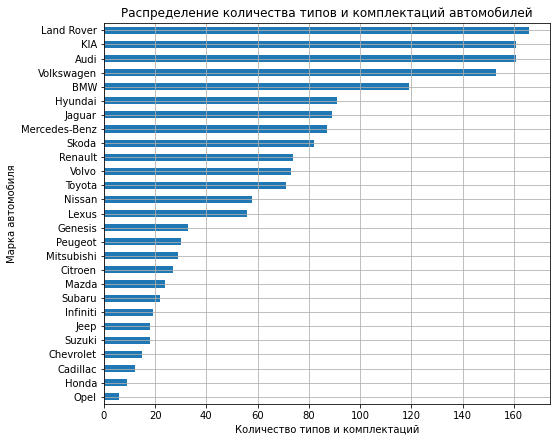

In [187]:
plt.figure(figsize=(8, 7))
plt.title('Распределение количества типов и комплектаций автомобилей')
df['brand'].value_counts(ascending=True).plot(kind='barh')
plt.xlabel('Количество типов и комплектаций')
plt.ylabel('Марка автомобиля')
plt.grid(True)

In [188]:
# Так-то... в большинстве случаев зная только модель автомобиля можно предсказать его тип кузова, потому, что например  

##### 2.3 Признак "model"

In [189]:
len(df['model'].unique())

246

Всего 246 моделей. Лучше оставить их в текстовом варианте как есть. Можно создать из этого фиктивные переменные, но получится очень много признаков, что усложнит модель.

Более того скорее всего этот признак будет больше всего влиять на классификацию, потому, что определенная модель автомоблия чаще всего имеет единственный тип кузова.

In [190]:
df[df['brand'] == 'BMW'].head(5)

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,max_speed,fuel_con_CHM,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car
161,BMW,2 Series,218i MT,Купе класса C,5,2,бензиновый (1499 см³),136 л. с.,220 Н·м,механическая (6 ступеней),...,210 км/ч,6.3 / 4.4 / 5.1,145 мм,4432 × 1774 × 1418,2690 мм,390 л,390 л,52 л,1345 кг,coupe
162,BMW,2 Series,218i,Купе класса C,5,2,бензиновый (1499 см³),136 л. с.,220 Н·м,автоматическая (8 ступеней),...,210 км/ч,6.2 / 4.4 / 5.1,145 мм,4432 × 1774 × 1418,2690 мм,390 л,390 л,52 л,1475 кг,coupe
163,BMW,2 Series,M240i xDrive,Купе класса C,5,2,бензиновый (2998 см³),340 л. с.,500 Н·м,автоматическая (8 ступеней),...,250 км/ч,9.8 / 6 / 7.4,145 мм,4432 × 1774 × 1418,2690 мм,390 л,390 л,52 л,1615 кг,coupe
164,BMW,2 Series Gran Coupe,218i Online Edition,Седан класса C,5,4,бензиновый (1499 см³),140 л. с.,220 Н·м,роботизированная (7 ступеней),...,215 км/ч,6.5 / 4.7 / 5.4,145 мм,4526 × 1800 × 1420,2670 мм,430 л,430 л,42 л,1450 кг,sedan
165,BMW,2 Series Gran Coupe,218i,Седан класса C,5,4,бензиновый (1499 см³),140 л. с.,220 Н·м,роботизированная (7 ступеней),...,215 км/ч,6.5 / 4.7 / 5.4,145 мм,4526 × 1800 × 1420,2670 мм,430 л,430 л,42 л,1450 кг,sedan


In [191]:
df[df['brand'] == 'KIA'].head(5)

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,max_speed,fuel_con_CHM,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car
593,KIA,Ceed,1.4T-GDI Luxe 7AMT,Хэтчбек класса C,5,5,бензиновый (1353 см³),140 л. с.,242 Н·м,роботизированная (7 ступеней),...,205 км/ч,7.7 / 5.2 / 6.1,150 мм,4310 × 1800 × 1447,2650 мм,395 л,1291 л,50 л,1260 кг,hatchback
594,KIA,Ceed,1.6 Comfort 6MT,Хэтчбек класса C,5,5,бензиновый (1591 см³),128 л. с.,155 Н·м,механическая (6 ступеней),...,195 км/ч,8.7 / 5.6 / 6.8,150 мм,4310 × 1800 × 1447,2650 мм,395 л,1291 л,50 л,1204 кг,hatchback
595,KIA,Ceed,1.4T-GDI Prestige 7AMT,Хэтчбек класса C,5,5,бензиновый (1353 см³),140 л. с.,242 Н·м,роботизированная (7 ступеней),...,205 км/ч,7.7 / 5.2 / 6.1,150 мм,4310 × 1800 × 1447,2650 мм,395 л,1291 л,50 л,1260 кг,hatchback
596,KIA,Ceed,1.6 Comfort 6AT,Хэтчбек класса C,5,5,бензиновый (1591 см³),128 л. с.,155 Н·м,автоматическая (6 ступеней),...,192 км/ч,9.8 / 5.8 / 7.3,150 мм,4310 × 1800 × 1447,2650 мм,395 л,1291 л,50 л,1232 кг,hatchback
597,KIA,Ceed,1.6 Luxe 6AT,Хэтчбек класса C,5,5,бензиновый (1591 см³),128 л. с.,155 Н·м,автоматическая (6 ступеней),...,192 км/ч,9.8 / 5.8 / 7.3,150 мм,4310 × 1800 × 1447,2650 мм,395 л,1291 л,50 л,1232 кг,hatchback


Информация содержащаяся в этой колонке дублируется в других. Чаще всего в комплектации указывают двигатель бензин/дизель, коробка передач, объем двигателя. А дополнение типа "Comfort", "Online Edition" больше относится к внутреннему наполнению автомобиля, что влияет на его цену, но не на тип кузова.
Поэтому этот признак можно удалить.

##### 2.4 Признаки количество мест, дверей

In [192]:
df['seats'].unique()

array([5, 4, 7, 2, 6, 8, 1, 9], dtype=int64)

Посмотрим подробнее

In [214]:
df[df['seats'] > 7 ]['main_type_car'].value_counts()

van          16
crossover     6
SUV           1
Name: main_type_car, dtype: int64

In [194]:
df[df['seats'] ==1 ]

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,max_speed,fuel_con_CHM,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car
1431,Toyota,Hiace,3.0D MT Standart,Вэн,1,3,дизельный (2755 см³),150 л. с.,420 Н·м,механическая (6 ступеней),...,150 км/ч,0 / 0 / 0,185 мм,5915 × 1950 × 2280,3860 мм,0 л,1935 л,70 л,2125 кг,van


Более 7 мест в машинах таких типов (van, crossover,SUV) действиетельно есть. А вот 1 место в Toyota Hiace скорее ошибка. Хотя это микроавтобус и там может быть только место видителя, например. Однако это значение мы исправим на 9 как у других автомобилей такой марки и модели. 

In [195]:
df.loc[1431, 'seats'] = 9

In [196]:
df['doors'].unique()

array([4, 5, 2, 7, 8, 6, 3], dtype=int64)

4 и больше 5 дверей это уже подозрительно. Заменим количество дверей больше 5 и если дверей 4 на 5 дверей.

In [197]:
df['doors'] = df['doors'].apply(lambda x : 5 if x > 5 or x == 4 else x)

In [198]:
df['doors'].unique()

array([5, 2, 3], dtype=int64)

In [203]:
# Посмотрим на машины с 2 дверьми
df[df['doors'] == 2]['main_type_car'].value_counts()

coupe        43
roadster      9
cabriolet     5
SUV           3
Name: main_type_car, dtype: int64

3 внедорожника с 2 дверьми, посомрим ближе.

In [204]:
df[(df['doors'] == 2) & (df['main_type_car'] == 'SUV')]

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,max_speed,fuel_con_CHM,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car
587,Jeep,Wrangler 2D,2.0 AT8 Sport,Внедорожник класса B,4,2,бензиновый (1995 см³),272 л. с.,400 Н·м,автоматическая (8 ступеней),...,0 км/ч,0 / 0 / 0,246 мм,4334 × 1894 × 1858,2459 мм,142 л,430 л,66 л,1819 кг,SUV
588,Jeep,Wrangler 2D,2.0 AT8 Sahara,Внедорожник класса B,4,2,бензиновый (1995 см³),272 л. с.,400 Н·м,автоматическая (8 ступеней),...,0 км/ч,0 / 0 / 0,246 мм,4334 × 1894 × 1878,2459 мм,142 л,430 л,66 л,1819 кг,SUV
589,Jeep,Wrangler 2D,2.0 AT8 Rubicon,Внедорожник класса B,4,2,бензиновый (1995 см³),272 л. с.,400 Н·м,автоматическая (8 ступеней),...,0 км/ч,0 / 0 / 0,246 мм,4334 × 1894 × 1879,2459 мм,142 л,430 л,66 л,1819 кг,SUV


У Jeep Wrangler могут быть комплектации с 2 дверьми...

In [208]:
# Посмотрим на машины с 3 дверьми
df[df['doors'] == 3]

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,max_speed,fuel_con_CHM,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car
1388,Suzuki,Jimny,GL MT,Внедорожник класса B,4,3,бензиновый (1462 см³),102 л. с.,130 Н·м,механическая (5 ступеней),...,145 км/ч,7.7 / 6.2 / 6.8,210 мм,3650 × 1645 × 1725,2250 мм,85 л,830 л,40 л,1090 кг,SUV
1389,Suzuki,Jimny,GL AT,Внедорожник класса B,4,3,бензиновый (1462 см³),102 л. с.,130 Н·м,автоматическая (4 ступеней),...,140 км/ч,8.4 / 6.9 / 7.5,210 мм,3650 × 1645 × 1725,2250 мм,85 л,830 л,40 л,1110 кг,SUV
1390,Suzuki,Jimny,GLX AT,Внедорожник класса B,4,3,бензиновый (1462 см³),102 л. с.,130 Н·м,автоматическая (4 ступеней),...,140 км/ч,8.4 / 6.9 / 7.5,210 мм,3650 × 1645 × 1725,2250 мм,85 л,830 л,40 л,1110 кг,SUV
1431,Toyota,Hiace,3.0D MT Standart,Вэн,9,3,дизельный (2755 см³),150 л. с.,420 Н·м,механическая (6 ступеней),...,150 км/ч,0 / 0 / 0,185 мм,5915 × 1950 × 2280,3860 мм,0 л,1935 л,70 л,2125 кг,van


У Suzuki Jimny действительно 3 двери, а вот у Toyota Hiace - 5.

In [209]:
df.loc[1431, 'doors'] = 5

In [210]:
df['doors'].unique()

array([5, 2, 3], dtype=int64)

In [211]:
df['seats'].unique()

array([5, 4, 7, 2, 6, 8, 9], dtype=int64)